In [23]:
import numpy as np  
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import mean_squared_error,log_loss,roc_auc_score,accuracy_score,confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import KFold 

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.externals import joblib
from keras import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing 
from xgboost import XGBRegressor, plot_importance



In [24]:
student_data = pd.read_csv('features.csv')

In [25]:
student_data.head()


,college,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,Grade1,Grade2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,0,11,11,Computers,Satisfactory,Always Regular,Failure,Satisfactory
1,GP,F,19,U,GT3,T,1,1,at_home,other,...,3,2,9,11,11,Computers,Satisfactory,Always Regular,Poor,Satisfactory
2,GP,F,20,U,LE3,T,1,1,at_home,other,...,3,6,12,13,12,Computers,Satisfactory,Always Regular,Satisfactory,Satisfactory
3,GP,F,20,U,GT3,T,4,2,health,services,...,5,0,14,14,14,Computers,Satisfactory,Always Regular,Satisfactory,Satisfactory
4,GP,F,20,U,GT3,T,3,3,other,other,...,5,0,11,13,13,Computers,Satisfactory,Always Regular,Satisfactory,Satisfactory


In [26]:
# train.to_csv('student.csv', index=False)

In [27]:

lb=LabelEncoder()
lb.fit(student_data['FinalGrade'])
student_data['FinalGrade']=lb.transform(student_data['FinalGrade'])


In [28]:
student_data.head()

,college,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,Grade1,Grade2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,0,11,11,Computers,4,Always Regular,Failure,Satisfactory
1,GP,F,19,U,GT3,T,1,1,at_home,other,...,3,2,9,11,11,Computers,4,Always Regular,Poor,Satisfactory
2,GP,F,20,U,LE3,T,1,1,at_home,other,...,3,6,12,13,12,Computers,4,Always Regular,Satisfactory,Satisfactory
3,GP,F,20,U,GT3,T,4,2,health,services,...,5,0,14,14,14,Computers,4,Always Regular,Satisfactory,Satisfactory
4,GP,F,20,U,GT3,T,3,3,other,other,...,5,0,11,13,13,Computers,4,Always Regular,Satisfactory,Satisfactory


In [7]:
y=student_data[['FinalGrade']]
student_data = student_data.drop(['Regularity'],axis=1);
student_data = student_data.drop(['Grade1'],axis=1);
student_data = student_data.drop(['Grade2'],axis=1);
student_data = student_data.drop(['FinalGrade'],axis=1);
student_test_data = student_data;
student_data = pd.get_dummies(student_data);

student_data.head()
# student_data = student_data.drop(['G2'],axis=1);
# student_data = student_data.drop(['G1'],axis=1);
# student_data = student_data.drop(['Regularity'],axis=1);

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,cet_no,cet_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,subject_Computers,subject_EC
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,1,1,0,1,0,1,0
1,19,1,1,1,2,0,5,3,3,1,...,1,0,0,1,0,1,1,0,1,0
2,20,1,1,1,2,0,4,3,2,2,...,0,1,0,1,0,1,1,0,1,0
3,20,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,1,0
4,20,3,3,1,2,0,4,3,2,1,...,0,1,0,1,1,0,1,0,1,0


In [8]:

from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(student_data,y,test_size=0.3,random_state=1)
print(x_train)

      age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
276    20     2     1           3          1         0       4         3   
954    21     2     4           1          2         1       4         4   
631    18     1     1           4          3         0       4         3   
817    17     2     2           1          2         0       5         1   
185    20     1     0           2          2         0       4         3   
286    19     2     1           1          1         0       4         4   
794    19     1     1           1          2         0       4         4   
1028   20     3     1           1          2         0       4         5   
491    21     1     1           2          2         1       1         1   
459    20     1     1           4          3         0       4         4   
61     20     1     1           4          1         0       5         5   
382    19     3     3           1          1         0       4         2   
945    19   

In [9]:
y_train.shape

(730, 1)

In [10]:
test_data = pd.read_csv('test.csv');
student_test_data=pd.concat([student_test_data, test_data], axis=0);
student_test_data = pd.get_dummies(student_test_data);

student_test_data.head()

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_val)
y_predict=lr.predict_proba(x_val)


/home/shank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/shank/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [11]:
student_test_data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,cet_no,cet_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,subject_Computers,subject_EC
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,1,1,0,1,0,1,0
1,19,1,1,1,2,0,5,3,3,1,...,1,0,0,1,0,1,1,0,1,0
2,20,1,1,1,2,0,4,3,2,2,...,0,1,0,1,0,1,1,0,1,0
3,20,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,1,0
4,20,3,3,1,2,0,4,3,2,1,...,0,1,0,1,1,0,1,0,1,0


In [12]:
# y_pred=y_pred.astype('int')


In [13]:
log_loss(y_val,y_predict)

0.5808345691189847

In [14]:
accuracy_score(y_val,y_pred)

0.7579617834394905

In [15]:
# lr.score(x_val, y_val)

In [16]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()

svc.fit(x_train, y_train)

y_pred = svc.predict(x_val)



/home/shank/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shank/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [17]:
accuracy_score(y_val,y_pred)

0.9331210191082803

In [18]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

forest = RandomForestClassifier(n_estimators=346, min_samples_leaf=2)
f = forest.fit(x_train, y_train)
print("Raondom Forest Model Score" , ":" , f.score(x_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(x_val, y_val))

/home/shank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Raondom Forest Model Score : 0.9986301369863013 , Cross Validation Score : 0.9554140127388535


In [19]:
accuracy_score(y_val,y_pred)

0.9331210191082803

In [20]:
#log_loss(y_val,y_pred_prob)

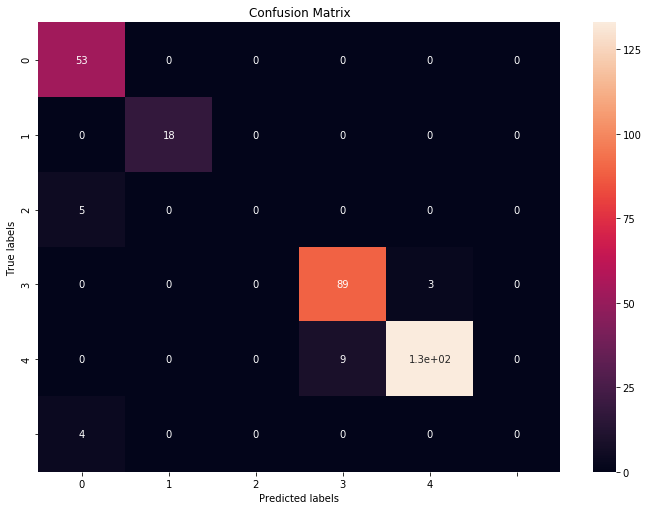

In [21]:
labels = list(range(0,5))
import seaborn as sns    
cm=confusion_matrix(y_val,y_pred)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [22]:
model = XGBClassifier()
model=XGBClassifier(learning_rate=0.1,n_estimators=100)
# kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

# for train_index, test_index in kf.split(X):
#       print("Train:", train_index, "Validation:",test_index)
#       X_train, X_test = x_train[train_index], x_val[test_index] 
#       y_train, y_test = y_train[train_index], y_val[test_index]

# kfold = StratifiedKFold(y_train, n_folds=3, shuffle=True, random_state=7)
# for traincv,testcv in kfold:
model.fit(x_train,y_train)


/home/shank/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shank/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [23]:
y_pred=model.predict(x_val)

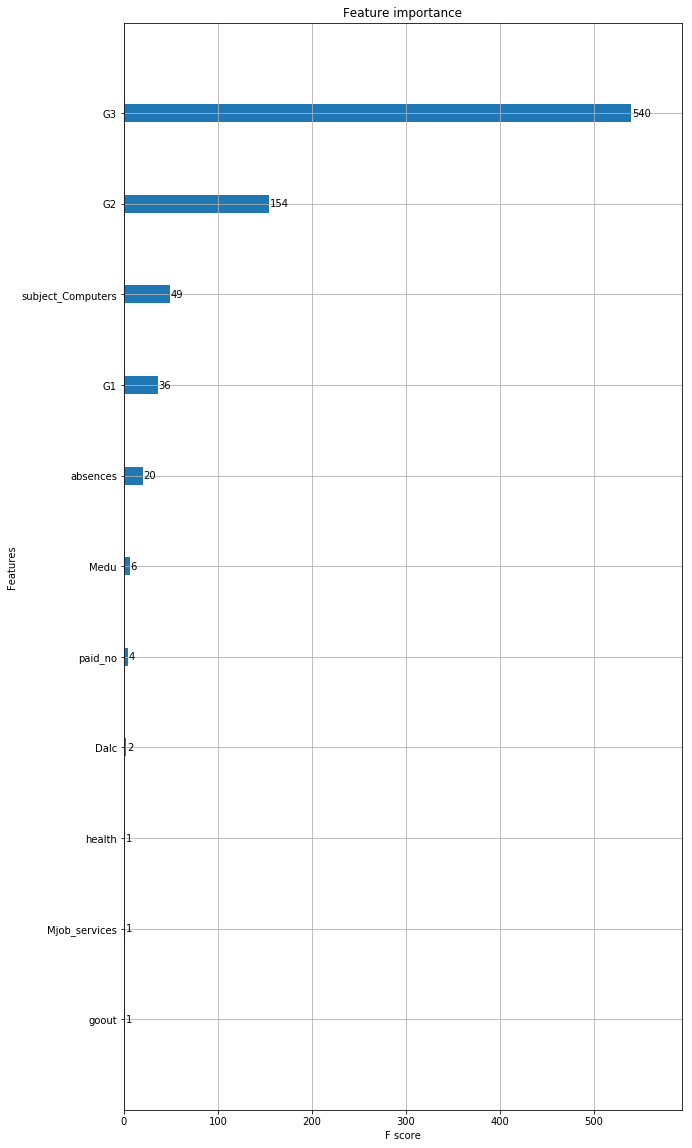

In [24]:
from xgboost import plot_importance
# plot feature importance
fig, ax = plt.subplots(figsize=(10, 20))
plot_importance(model, ax=ax)

plt.show()

In [25]:
accuracy_score(y_val,y_pred)

1.0

In [26]:
from sklearn.model_selection import KFold # import KFold
X = x_train
y = y_train
kf = KFold(n_splits=10) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=10, random_state=None, shuffle=False)

KFold(n_splits=10, random_state=None, shuffle=False)


KFold(n_splits=10, random_state=None, shuffle=False)

In [27]:
#k-fold cross validation
from sklearn.model_selection import cross_val_score
clf = model
cross_val_score(clf,x_train, y_train, cv=kf, n_jobs=1)

/home/shank/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shank/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shank/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shank/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


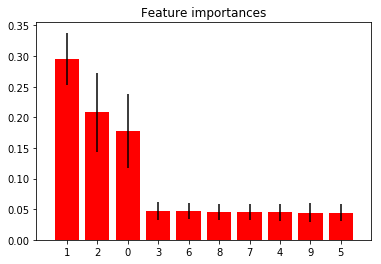

In [28]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()